In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/fake_reg.csv')

In [3]:
df.head() # based on feature 1 and feature 2 we will predict the price
# historical problem therefore a supervised leanring problem

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
sns.set_style('darkgrid')

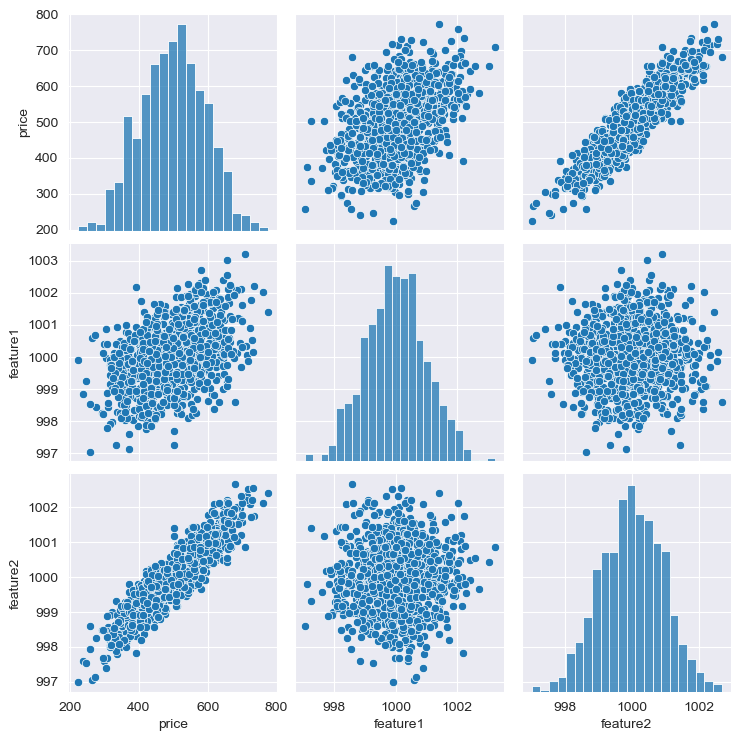

In [5]:
sns.pairplot(df)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[['feature1', 'feature2']].values

In [8]:
y = df['price'].values

In [9]:
X_trian, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_trian.shape

(700, 2)

In [11]:
X_test.shape

(300, 2)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
#help(MinMaxScaler)

In [14]:
scalar = MinMaxScaler()

In [15]:
scalar.fit(X_trian)

MinMaxScaler()

In [16]:
X_train = scalar.transform(X_trian)

In [17]:
X_test = scalar.transform(X_test)

In [18]:
X_train.max()

1.0

In [19]:
X_train.min()

0.0

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
help(Sequential)

In [ ]:
help(Dense)

In [35]:
# our model
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [37]:
# one epoch means you got thourgh the data set one time
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - loss: 251949.6406 
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 253337.0156
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 254641.1406
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 254438.3438
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 257111.6875
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 253163.6250
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 256268.2969
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 251320.0156 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 251906.5938
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 247834.4219
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 258134.3125
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 251143.6875
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 259699.7969
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 521u

In [38]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

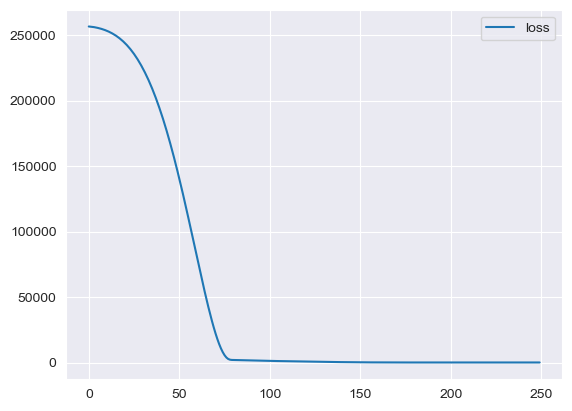

In [39]:
loss_df.plot()

In [40]:
model.evaluate(X_test, y_test, verbose=0)
# models loss of a mean squared error of 25.6
# we can interprest this result of our 

25.258018493652344

In [41]:
model.evaluate(X_train, y_train, verbose=0)

23.7582950592041

In [42]:
test_prediction = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [43]:
test_prediction = pd.Series(test_prediction.reshape(300,))


In [44]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [45]:
pred_df = pd.concat([pred_df,test_prediction], axis=1)

In [47]:
pred_df.columns = ['Test True Y', 'Model Predictions']

<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

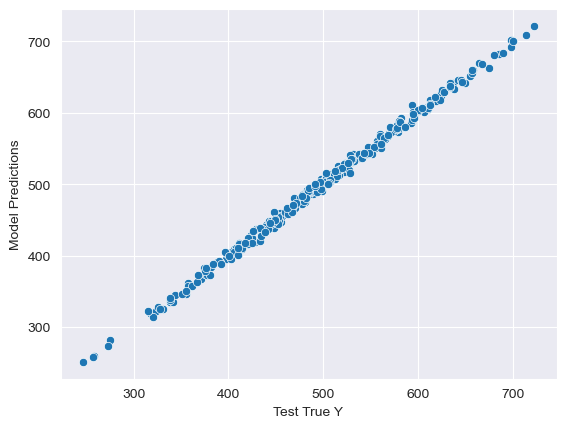

In [54]:
sns.scatterplot(data=pred_df, x='Test True Y', y='Model Predictions')

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [57]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.043929690702182

In [58]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

25.25801938980928

In [59]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

5.025735706322934

In [72]:
new_gem = [[998, 1000]]

In [73]:
new_gem = scalar.transform(new_gem)

In [74]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[420.07837]], dtype=float32)

In [75]:
from tensorflow.keras.models import load_model

In [78]:
model.save('my_gem_model.keras')

In [79]:
later_model = load_model('my_gem_model.keras')

In [80]:
later_model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[420.07837]], dtype=float32)